In [7]:
import numpy as np

import matplotlib.pyplot as plt

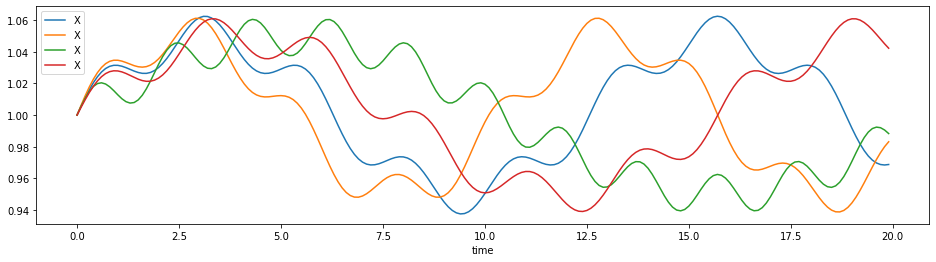

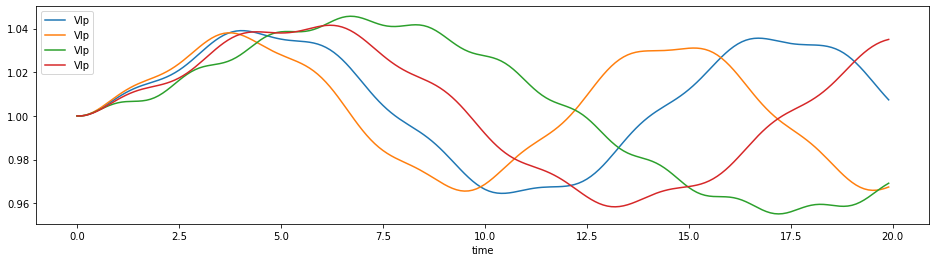

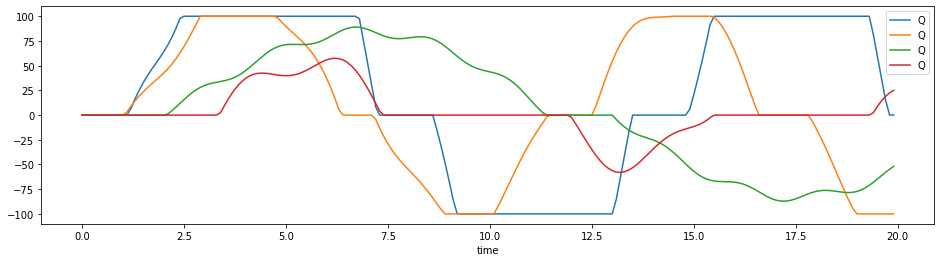

In [8]:

Ts = 0.1
time = np.arange(0,20,Ts)

# Inputs

w1 = np.array([0.5, 0.6, 0.3, 0.4])
w2 = np.array([2.5, 2.6, 3.3, 2.4])

X = np.zeros((4,len(time)))
for k1 in range(0,4):
    X[k1,:] = 1 + 0.05*np.sin(w1[k1]*time) + 0.0125*np.sin(w2[k1]*time)


# Inverter Parameters

# Inverter lowpass filter frequencies
wl = np.array([0.5, 0.5, 0.5, 0.5])
# Diagonal matrix of LP frequencies
L = np.diag(wl)

# Voltage breakpoints
VBP = np.array([[0.98, 0.99, 1.01, 1.02],
               [0.97, 0.99, 1.01, 1.03],
               [0.95, 0.99, 1.01, 1.05],
               [0.95, 0.97, 1.03, 1.05]])

# Inverter Internal States - vectorized
Vlp = np.zeros((4,len(time)))
Vlp[:,0] = 1

# Inverter reactive power
Q = np.zeros((4,len(time)))


# Run simulation over time
for kt in range(0,len(time)):
    if kt >= 1:
        
        # lowpass filter
        Vlp[:,kt] = (np.eye(4) - Ts*L)@Vlp[:,kt-1] + Ts*L@X[:,kt-1]
        
        # compare lowpass filtered voltage to first breakpoint
        idx = Vlp[:,kt] <= VBP[:,0]
        # set reactive power to -100
        Q[idx,kt] = -100
        
        # compare lowpass filtered voltage to first and second breakpoints
        idx = (Vlp[:,kt] >= VBP[:,0]) & (Vlp[:,kt] <= VBP[:,1])
        # linear equation
        Q[idx,kt] = 100*(Vlp[idx,kt] - VBP[idx,1])/(VBP[idx,1] - VBP[idx,0])
        
        # compare lowpass filtered voltage to second and third breakpoints
        idx = (Vlp[:,kt] >= VBP[:,1]) & (Vlp[:,kt] <= VBP[:,2])
        # set reactive power to 0
        Q[idx,kt] = 0
        
        # compare lowpass filtered voltage to third and fourth breakpoints
        idx = (Vlp[:,kt] >= VBP[:,2]) & (Vlp[:,kt] <= VBP[:,3])
        # linear equation
        Q[idx,kt] = 100*(Vlp[idx,kt] - VBP[idx,2])/(VBP[idx,3] - VBP[idx,2])
        
        # compare lowpass filtered voltage to fpurth breakpoint
        idx = Vlp[:,kt] >= VBP[:,3]
        # set reactive power to +100
        Q[idx,kt] = 100
        
fig1 = plt.figure(figsize=[16,4])
# plt.plot(time,xi1.T,label="xi1")
plt.plot(time,X.T,label='X')
# plt.title('$\\xi$')
plt.xlabel('time')
plt.legend()
        
fig1 = plt.figure(figsize=[16,4])
# for k1 in range(0,4):
#     plt.plot(time,VBP[0,k1]*np.ones(len(time)),'k--')
plt.plot(time,Vlp.T,label='Vlp')
# plt.title('$\\xi$')
plt.xlabel('time')
plt.legend()

fig1 = plt.figure(figsize=[16,4])
# plt.plot(time,xi1.T,label="xi1")
plt.plot(time,Q.T,label='Q')
# plt.title('$\\xi$')
plt.xlabel('time')
plt.legend()

plt.show()